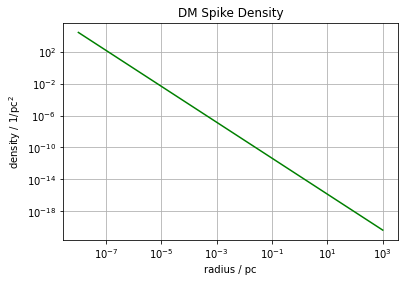

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30


# Definition of the binary system 
m_bar = 1
m1 =  m_bar * ms.solar_mass_to_pc   # The central mass m1 with a mass of 1 solar masses, converted to pc


m2 = 1e-3 * ms.solar_mass_to_pc   # The secondary mass of 1e-3 solar mass converted to pc

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc



ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1  # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)




# Plot density
r_grid = np.geomspace(1e-8, 1e3, 100)  # creates a grid in pc
plt.loglog(r_grid, spike.density(r_grid), 'g')
plt.grid()
plt.xlabel("radius / pc")
plt.ylabel("density / 1/pc$^2$")
plt.title('DM Spike Density')
plt.savefig('spike density.pdf')
plt.show()

In [52]:
m_1 = 1e-3   #in units of M☉
m_2 = 2*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)

print("dy=",dy)

y_list = np.zeros(20)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))


for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + ((i/4)*dy))
    
print("m =", m_2_list, "M_solar")


Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(m_1 + 0.5*dy) - np.exp(m_1 - 0.5*dy)
     
print("Δ =", Δ_1_list)
    
    
    
    

def a(m_1,m_2,Δ_1,Δ_2):
    
    f_pbh = 4.3e-3
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 2.6
        M = 1e-4     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return ( 0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)

     

dy= 0.6931471805599454
m = [1.00000000e-03 1.74286795e-01 3.47573590e-01 5.20860385e-01
 6.94147181e-01 8.67433976e-01 1.04072077e+00 1.21400757e+00
 1.38729436e+00 1.56058116e+00 1.73386795e+00 1.90715475e+00
 2.08044154e+00 2.25372834e+00 2.42701513e+00 2.60030193e+00
 2.77358872e+00 2.94687552e+00 3.12016231e+00 3.29344911e+00] M_solar
Δ = [ 0.70781424  0.84173773  1.0010005   1.19039692  1.41562848  1.68347546
  2.002001    2.38079383  2.83125697  3.36695093  4.004002    4.76158767
  5.66251393  6.73390186  8.008004    9.52317534 11.32502787 13.46780372
 16.016008   19.04635067]


In [61]:
def r_isko(m):
    return (6*G*m)/(c**2)


print("a_i =", a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0]), "pc") 

  

a_0 = a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0])/r_isko(1)


print("a_0 =" ,a_0)

a_i = 0.055001117908121726 pc
a_0 = 191917392308.85043


Evolving from  191917.39230885042  to  1.0 r_isco  with initial eccentricity 0.7  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

A termination event occurred.
 -> Evolution took 2.6390s
Evolving from  191917.39230885042  to  1.0 r_isco  with initial eccentricity 0.5  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in sqrt
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:359: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/inspiral.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a * (1-e**2) * sp.m_total(a) * sp.m_reduced(a)**2 )


A termination event occurred.
 -> Evolution took 2.4751s
Evolving from  191917.39230885042  to  1.0 r_isco  with initial eccentricity 0.3  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 2.1780s
Evolving from  96918.28311596946  to  1.0 r_isco  with initial eccentricity 0.7  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -

ValueError: `ts` must be strictly increasing or decreasing.

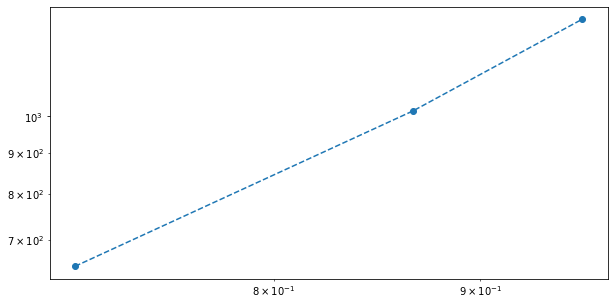

In [65]:
sp = ms.SystemProp(m1, m2, spike, D_luminosity)   # Create the SystemProp object describing the IMRI system

# Setting initial and final conditions of the binary evolution for an eccentric orbit

a0_array = np.linspace(1e-6*a_0, 1e-8*a_0, 3)

e0_array = np.linspace(0.7, 0.3, 3) 

a0_list = a0_array.tolist()            

e0_list = e0_array.tolist()


a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution



plt.figure(figsize = (10, 5))
t_m_list = np.zeros(len(e0_list))
j_i_list = np.zeros(len(e0_list))


for i, a0 in enumerate (a0_list):
    for k, e0 in enumerate (e0_list):
        a0 = a0_list[i] * sp.r_isco()
        e_0 = e0_list[k] 
        j_i_list[k] = np.sqrt(1 - (e0**2))
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
        t_m_list[k] = ev_ecc.t[-1]/ms.year_to_pc
    plt.loglog(j_i_list, t_m_list, '--o')
    
    
    
plt.legend([ '%0.1f'% a0_list[0], '%0.1f'% a0_list[1], '%0.1f'% a0_list[2] ], 
           title= '$a_{i} \hspace{0.2} [r_{isco}]$', 
            title_fontsize = 12, loc = 'lower right', prop = {"size":8})
plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('t_m vs j_i for m_1 = 1 M☉ and m_2 = 10^-3 M☉ with halos')
plt.grid()
plt.show()